In [1]:
import networkx as nx  

import sys
import os
from dotenv import load_dotenv
project_dir = os.getenv("PROJECT_PATH")

sys.path.insert(2, project_dir + '/')
sys.path.insert(2, project_dir + '/utils/')
sys.path.insert(3, project_dir + '/utils/neo4j/')

import graph as graph
import query as query
from connection import Neo4jConnection

conn = Neo4jConnection(uri=os.getenv("DB_URI"), 
                    user=os.getenv("DB_USERNAME"),              
                    pwd=os.getenv("DB_PASSWORD"))

graph_name = 'MyGraph'
graph.create_graph(conn,graph_name)

Query failed: {code: Neo.ClientError.Procedure.ProcedureNotFound} {message: There is no procedure with the name `gds.graph.drop` registered for this database instance. Please ensure you've spelled the procedure name correctly and that the procedure is properly deployed.}
Query failed: {code: Neo.ClientError.Procedure.ProcedureNotFound} {message: There is no procedure with the name `gds.graph.project` registered for this database instance. Please ensure you've spelled the procedure name correctly and that the procedure is properly deployed.}


In [15]:
graph.get_degree(conn,graph_name).head(10)

,name,weightedFollowers
0,Data Scientist,1376.666667
1,Data Analyst,1340.000000
2,xpeditor,0.000000
3,xml,0.000000
4,wsus,0.000000
5,work devotee,0.000000
6,wireshark,0.000000
7,winscp,0.000000
8,windows xp,0.000000
9,windows services,0.000000


In [16]:
graph.get_closeness(conn,graph_name).head(10)

,name,score
0,windows xp,1.0
1,windows,1.0
2,visualization,1.0
3,visual basic,1.0
4,visio,1.0
5,vba,1.0
6,unix,1.0
7,transact-sql,1.0
8,training,1.0
9,time series forecasting,1.0


In [17]:
graph.get_betweenness(conn,graph_name).head(10)

,name,score
0,sapui5 (primary skill),0.0
1,Business Analyst,0.0
2,Cloud Engineer,0.0
3,Data Analyst,0.0
4,Data Engineer,0.0
5,Data Scientist,0.0
6,Machine Learning Engineer,0.0
7,Software Engineer,0.0
8,abap/4,0.0
9,accounts payable-fi-a/p,0.0


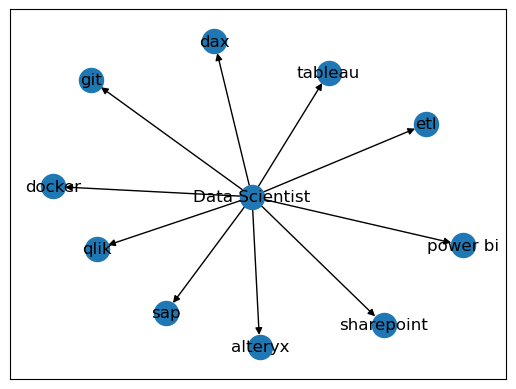

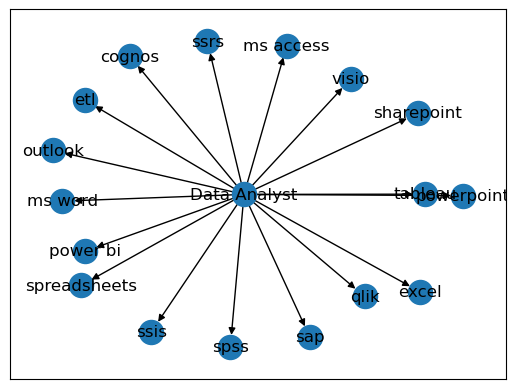

In [18]:
import matplotlib.pyplot as plt

def show_graph(graph):
   
    G = nx.MultiDiGraph()
    nodes = list(graph._nodes.values())
    for node in nodes:    
        G.add_node(node._properties["name"], labels=node._labels, properties=node._properties)
    rels = list(graph._relationships.values())
    for rel in rels:   
        G.add_edge(rel.start_node._properties["name"], rel.end_node._properties["name"], key=rel.element_id, type=rel.type, properties=rel._properties)
  
    nx.draw_networkx(G,with_labels=True)
    plt.show()


show_graph(query.get_all_for_graph(conn,"Data Scientist"))
show_graph(query.get_all_for_graph(conn,"Data Analyst"))